In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [87]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

dataframe['rate'] = dataframe['rate'].apply(handleRate) 
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [89]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# What type of restaurant do the majority of customers order from?

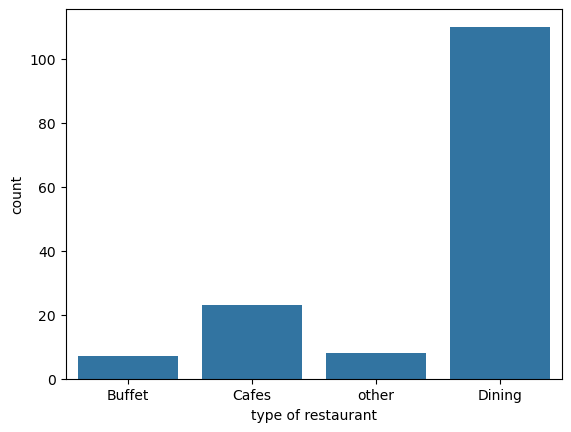

In [34]:
sns.countplot(x =dataframe['listed_in(type)'])
plt.xlabel("type of restaurant")
plt.show()

Majority of Cutomers order from Dining

# How many votes has each type of restaurant received from customers?

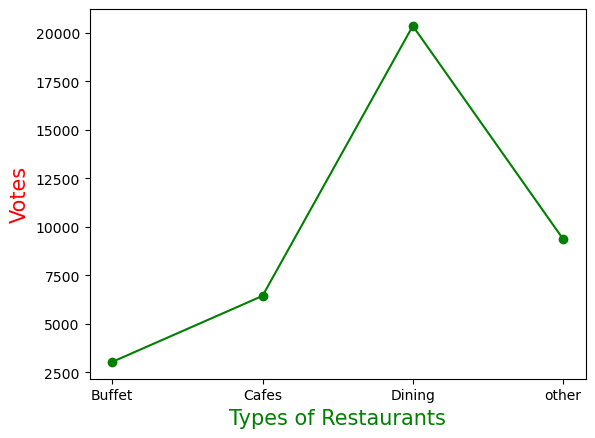

In [58]:
group_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': group_data})
plt.plot(result.index, result['votes'], c="green", marker="o")
plt.xlabel("Types of Restaurants", c="green", size=15)
plt.ylabel("Votes", c="red", size=15)
plt.show()


Dining has recived highest vote 

# What are the ratings that the majority of restaurants have received?

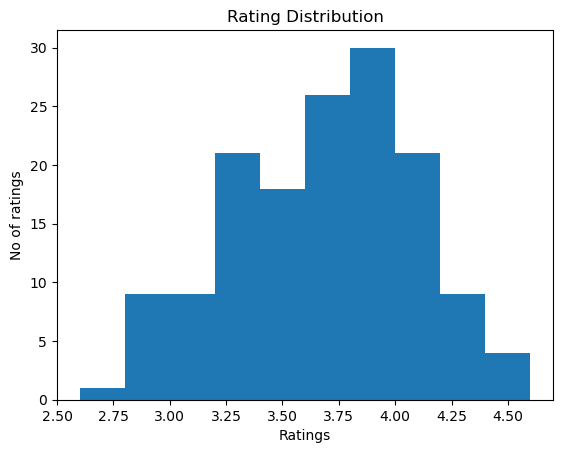

In [73]:
plt.hist(dataframe['rate'], bins = 10)
plt.title("Rating Distribution")
plt.xlabel("Ratings")
plt.ylabel("No of ratings")
plt.show()

The majority of resutaurant recieves 3.5 to 4 rating

# Zomato has observed that most couples order most of their food online. What is the average spending on each order?

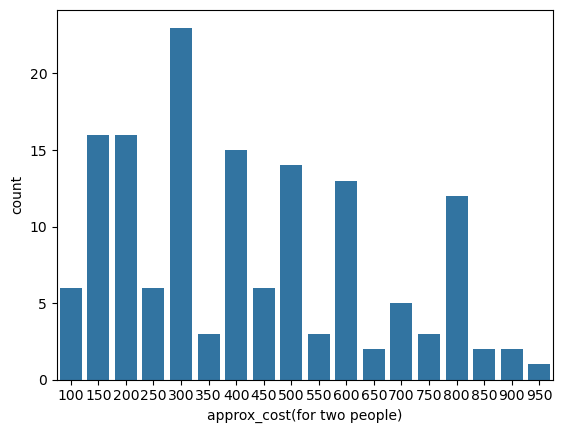

In [85]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x =couple_data)
plt.show()

The majority of couples prefer the resturant with an approximate cost of rupees 300

# Which mode (online or offline) has received the maximum rating?

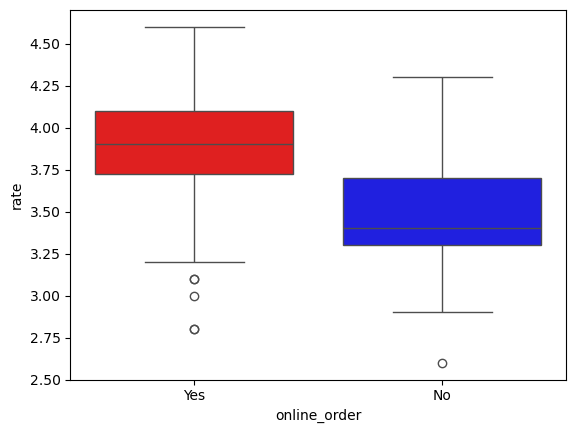

In [118]:
plt.figure(figure = (6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe, hue = 'online_order', palette=['red', 'blue'])
plt.show()

Offline orders received lower rating in comparison to Online order

# Which type of restaurant received more offline orders, so that Zomato can offer customers with some good offers?

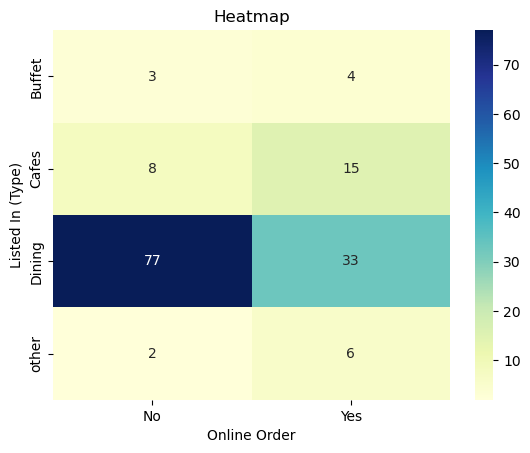

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Dining restaurant primarily accept offine order whereas cafes primarly recieve online orders. This suggests that client in Dining prefer
resturant whereas online in cafe